Some important features:

adr: 
Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

reservation_status: 
Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

customer_type:
Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

market_segment/distribution_channel:
Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

meal:
Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

Load data
- hotel_df: original data set with everything in it

Deal with missing value
- df: after dropping & imputing missing values

Variable identification 
- Numerical Variable  : numeric
- Categorical Variable :catagorical

Analysis on cancellation 
- Cancellation count
- Cancellation rate 

What influnced cancellation
- Change of room type 
- Repeated guest or not 

Feature Selection

Split Train/Test Dataset

Modeling 
- Logistic regression  
- Random Forest
- Decision Tree Classifier 
- KNN
- Naive Bayes

# Load packages and data

In [59]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [60]:
#load data as dataframe
hotel_df = pd.read_csv("hotel_bookings.csv")
hotel_df.shape

(119390, 32)

In [61]:
hotel_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [62]:
pd.options.display.max_columns = None
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Erroneous value treatment

In [63]:
# check for missing values
hotel_df.isnull().sum()/hotel_df.shape[0]

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [64]:
#drop "company" column because of 94% missing value
df = hotel_df.drop(['company'],axis = 1)

In [65]:
#impute missing value 
#if "agent" is a missing value, it can be seen as no agent 
def impute(df):
    df["agent"].fillna(0,inplace=True)
    df["country"].fillna("PRT",inplace=True) # fill with mode 
    df['children'].fillna(df['children'].median(),inplace=True)
    return df
df = impute(df)

In [66]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# Separate numeric and categorical features

In [67]:
df.dtypes 

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [68]:
def get_numeric(dataset,numeric):
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in dataset.columns:
        if dataset[i].dtype in numeric_dtypes:
            if i in ['arrival_date_day_of_month']:
                pass
            else:
                numeric.append(i)     
    return numeric

In [69]:
numeric = get_numeric(df,[])

In [70]:
numeric

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

# Understanding of numerical features

In [71]:
#Correlation between numerical features

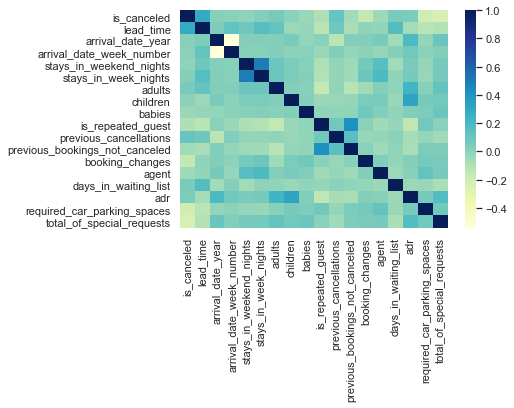

In [72]:
corr = df[['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']].corr()

sns.heatmap(corr, cmap="YlGnBu")

In [73]:
corr

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.046529,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.012640,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.056463,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.018244,0.022933,0.075791,0.001920,0.026149
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.161427,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.195135,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,0.024994,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.005515,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,0.050581,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,0.010395,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.030266,-0.010621,0.029186,0.037383,0.097889
is_repeated_guest,-0.084793,-0.124410,0.010341,-0.030131,-0.087239,-0.097245,-0.146426,-0.032858,-0.008943,1.000000,0.082293,0.418056,0.012092,-0.052264,-0.022235,-0.134314,0.077090,0.013050


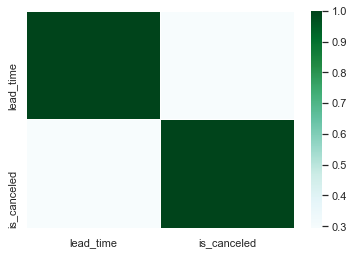

In [74]:
# numerical correlation
num_corr = df[['lead_time','is_canceled']].corr(method ='pearson')
sns.heatmap(num_corr, cmap="BuGn", linewidths=0.5)

# Understanding of categorical features

In [75]:
categorical = [i for i in df.columns.tolist() if i not in numeric]

In [76]:
categorical

['hotel',
 'arrival_date_month',
 'arrival_date_day_of_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

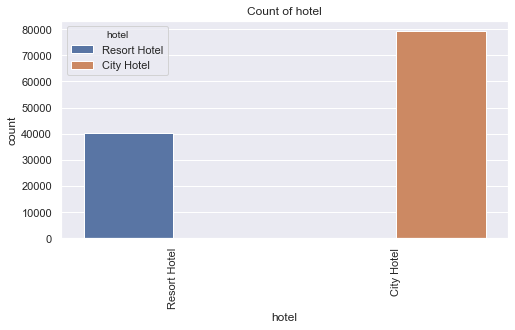

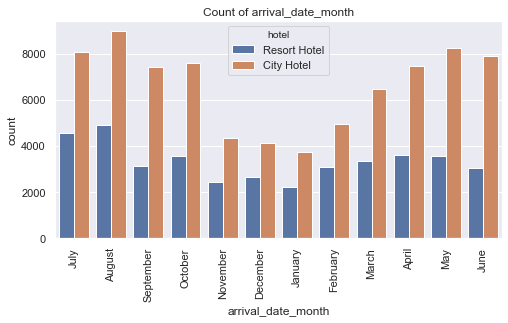

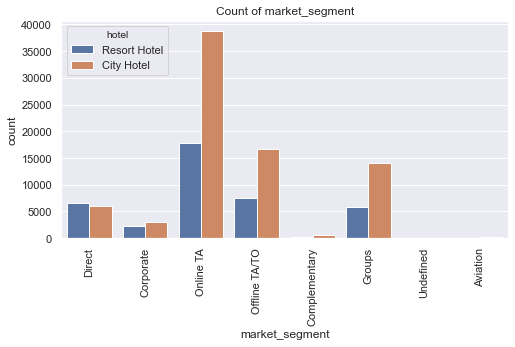

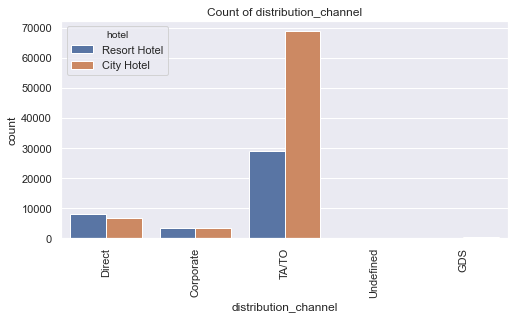

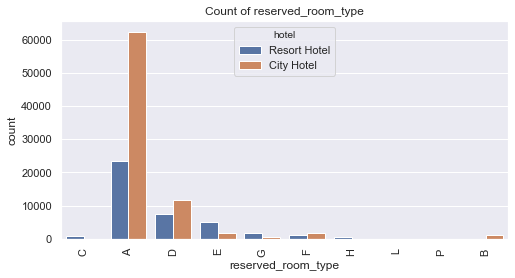

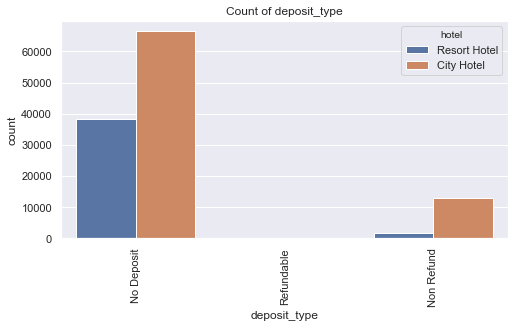

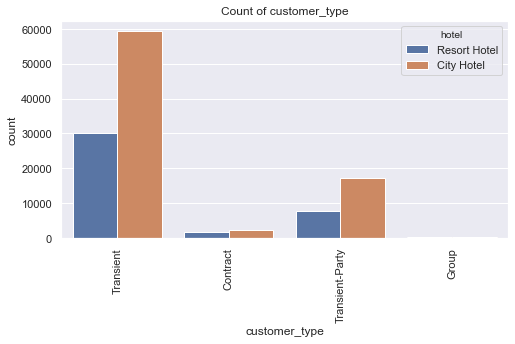

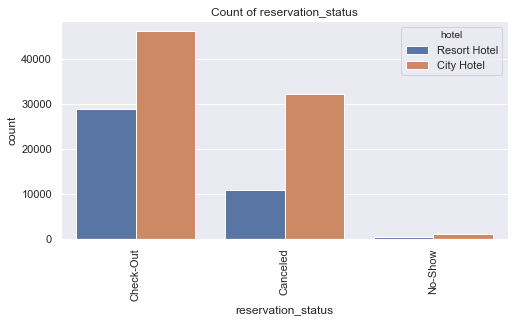

In [77]:
# Distribution of categorical features
for i in ['hotel',
 'arrival_date_month',
 #'arrival_date_day_of_month',
 #'meal',
 #'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 #'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 #'reservation_status_date'
         ]:
    sns.set(style = "darkgrid")
    plt.figure(figsize = (8,4))
    sns.countplot(x=i, data=df, hue = 'hotel')
    plt.xticks(rotation=90)
    plt.title('Count of {}'.format(i))
    plt.show()

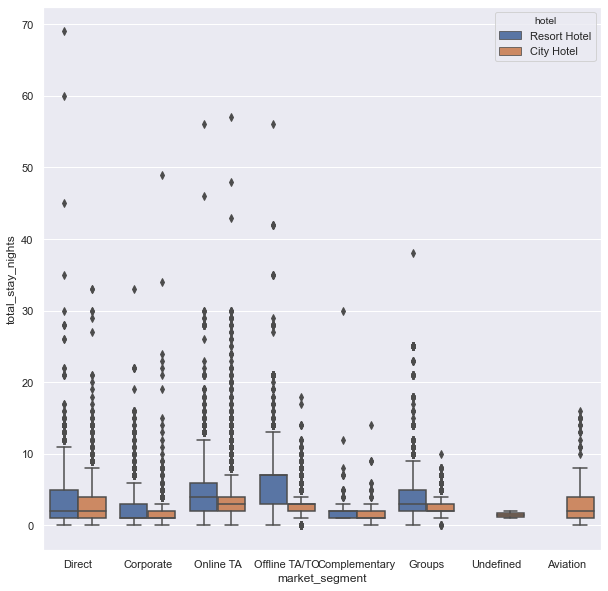

In [78]:
# Box plot - distribution of total stay night by market segmentation
df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
plt.figure(figsize = (10,10))
sns.boxplot(x = "market_segment", y = "total_stay_nights", data = df, hue = "hotel");

1. Most people stay no more than 10 days. 
2. In general, resort guests stay longer than city guests. 

# Analyze Cancellation

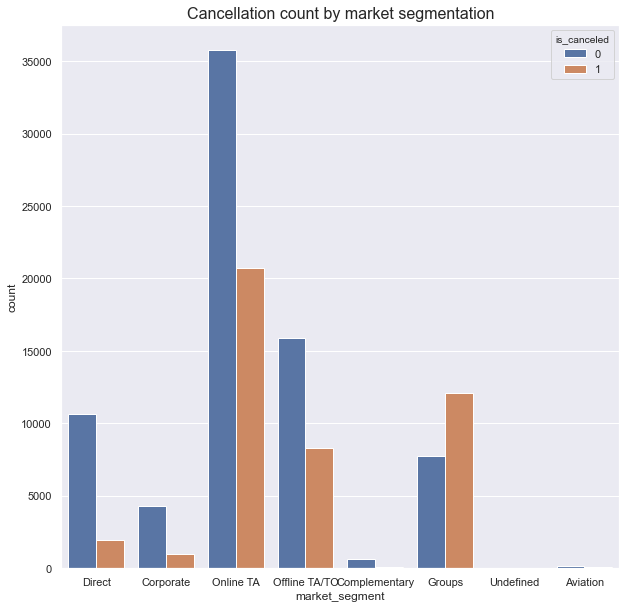

In [79]:
# Cancellation count distribution
plt.figure(figsize = (10,10))
plt.title("Cancellation count by market segmentation", fontdict = {'fontsize':16})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = df)

In [80]:
rh_book = df.loc[(df["hotel"] == "Resort Hotel")].groupby("market_segment")["hotel"].count()
rh_cancel = df.loc[(df["hotel"] == "Resort Hotel")].groupby("market_segment")["is_canceled"].sum()

In [81]:
ct_book = df.loc[(df["hotel"] == "City Hotel")].groupby("market_segment")["hotel"].count()
ct_cancel = df.loc[(df["hotel"] == "City Hotel")].groupby("market_segment")["is_canceled"].sum()

In [82]:
df_rh_cancel = pd.DataFrame({"Hotel": "Resort Hotel",
                                "market_segment": list(rh_book.index),
                                "Bookings": list(rh_book.values),
                                "Cancellations": list(rh_cancel.values)})
df_ct_cancel = pd.DataFrame({"Hotel": "City Hotel",
                                "market_segment": list(ct_book.index),
                                "Bookings": list(ct_book.values),
                                "Cancellations": list(ct_cancel.values)})

df_cancel = pd.concat([df_rh_cancel, df_ct_cancel], ignore_index=True)

In [83]:
df_cancel["cancel_percent"] = df_cancel["Cancellations"] / df_cancel["Bookings"] * 100

In [84]:
df_cancel["Cancellations"]

0        33
1       351
2       878
3      2474
4      1138
5      6248
6        52
7        64
8       641
9      1056
10     9623
11     7173
12    14491
13        2
Name: Cancellations, dtype: int64

In [85]:
df_cancel["Bookings"]

0       201
1      2309
2      6513
3      5836
4      7472
5     17729
6       237
7       542
8      2986
9      6093
10    13975
11    16747
12    38748
13        2
Name: Bookings, dtype: int64

In [86]:
market_segmentation_type = ["Direct", "Corporate", "Online TA", "Offiline TA/TO", "Complementary", "Groups", 
          "Undefined", "Aviation"]
df_cancel["market_segment"] = pd.Categorical(df_cancel["market_segment"], categories=market_segmentation_type, ordered=True)

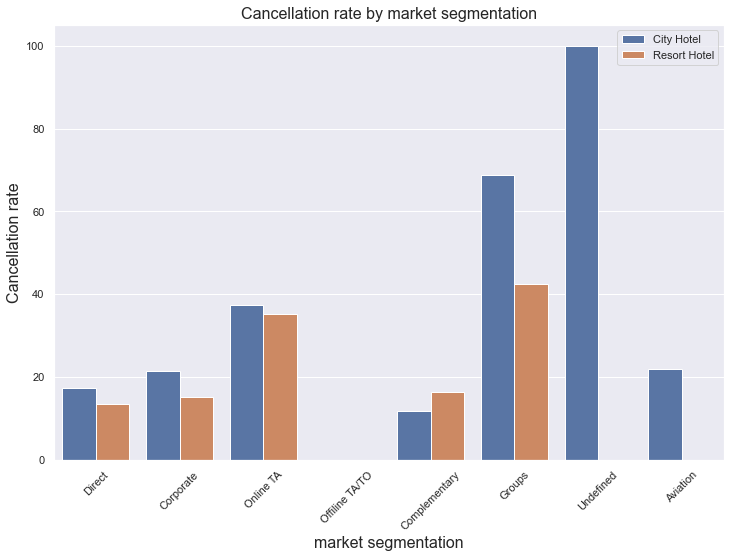

In [87]:
plt.figure(figsize=(12, 8))
sns.barplot(x = "market_segment", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=df_cancel)
plt.title("Cancellation rate by market segmentation", fontsize=16)
plt.xlabel("market segmentation", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancellation rate", fontsize=16)
plt.legend(loc="upper right")
plt.show()

By comparing cancellation rate and count, we can find 
1. although undefined has the least cancellation count, it has the highest cancellation rate
2. Overall, City hotel has higher cancellation rate, except for bookings via Complementary segmentation

In [88]:
# Overall cancellation rate
print("overall cancellation rate is",df['is_canceled'].sum()/ 119390)

overall cancellation rate is 0.37041628277075134


In [89]:
# Cancellation by room type changed 

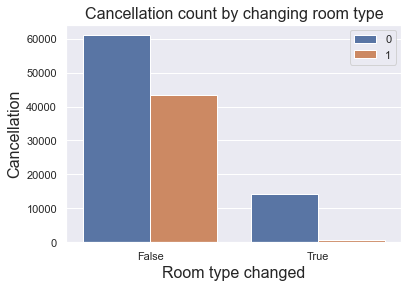

In [90]:
df['room_changed']=df['reserved_room_type']!=df['assigned_room_type']  # False - didn't change; Ture - changed
sns.countplot(x='room_changed',hue='is_canceled',data=df)
plt.title("Cancellation count by changing room type", fontsize=16)
plt.xlabel("Room type changed", fontsize=16)
plt.ylabel("Cancellation", fontsize=16)
plt.legend(loc="upper right")

Compared to people who checked in the same room type as the booked, people whose room type was changed had less possibility to cancel reservation. 

Possible reason: Room type after change is always better. 

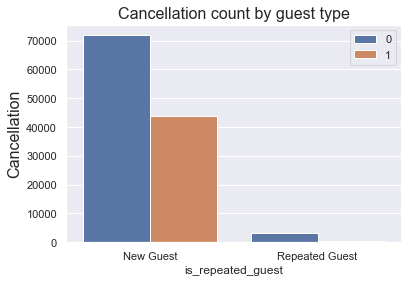

In [91]:
# Cancellation by repeated guest 
tick_label = ['New Guest', 'Repeated Guest']
sns.countplot(x='is_repeated_guest', hue='is_canceled', data=df)
plt.xticks([0, 1], tick_label)
plt.title("Cancellation count by guest type", fontsize=16)
plt.ylabel("Cancellation", fontsize=16)
plt.legend(loc="upper right")

Text(0.5, 0, 'Previous Un-Cancellations')

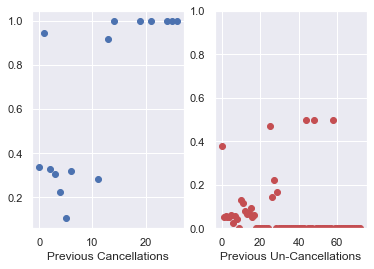

In [92]:
# Cancellation by cancellation history 
# previous cancellations 
#'bo' - blue points
plt.subplot(121)
plt.plot(df.groupby('previous_cancellations')['is_canceled'].mean(),
         'bo')
plt.xlabel('Previous Cancellations')
# previous_bookings_not_canceled
plt.subplot(122)
plt.plot(df.groupby('previous_bookings_not_canceled')['is_canceled'].mean(),
        'ro')
plt.ylim(0, 1)
plt.xlabel('Previous Un-Cancellations')

Those who had a cancellation history has more possibility to cancel again.

# Feature Selection

In [93]:
df.dtypes 

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [94]:
#Filer method? 
#Remove 'contriy' to avoid leaking privacy data
#Remove 'hotel', hotel should be treated as a classification criteria 
#Remove 'arrval_date_year' since it passed! 
#Remove 'reservation_status' and 'reservation_status_date' for making prediction 
#Remove 'booking_change' since this happens on the moment of check-in/ cancellation
df1 = df.drop(['country','hotel','arrival_date_year','reservation_status','reservation_status_date','booking_changes'], axis=1)

In [95]:
df1.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
deposit_type                       object
agent                             float64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces       

In [96]:
cat_list = ['arrival_date_month', 'meal', 'market_segment',
    'distribution_channel', 'reserved_room_type', 'assigned_room_type','deposit_type',
    'customer_type']

In [97]:
#to calculate correlation, transforming cat variables into numerics 
#why chooses labelencoder? 
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for ele in cat_list: 
    df1[ele] = le.fit_transform(df1.loc[:,ele])

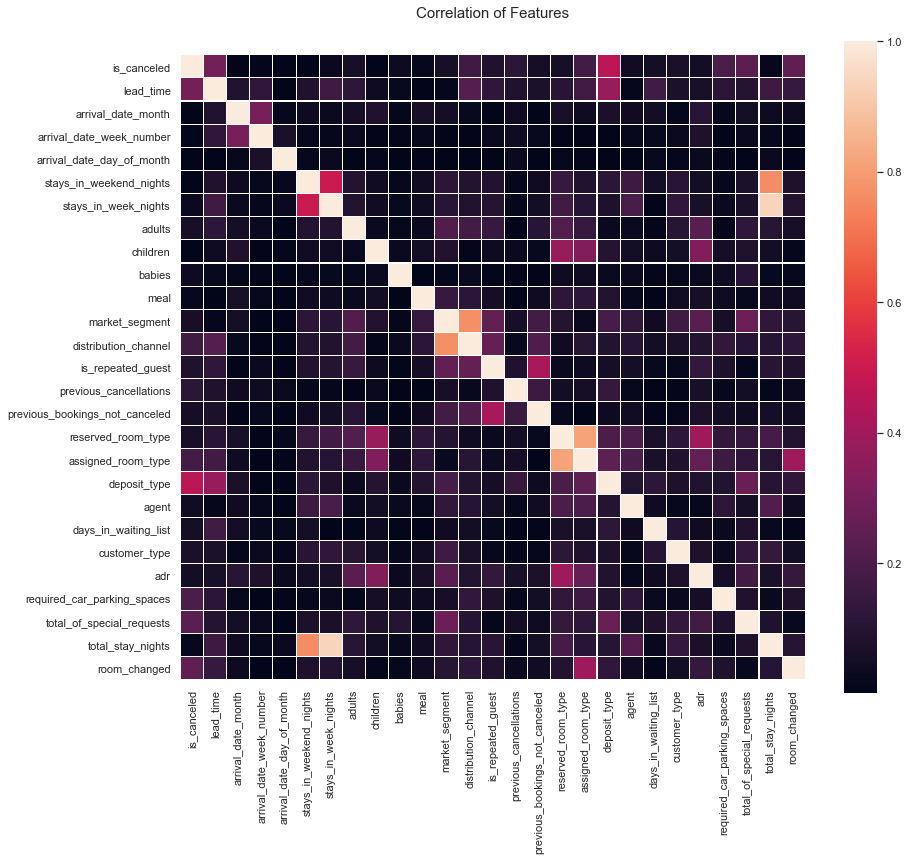

In [98]:
plt.figure(figsize=(14,12))
plt.title('Correlation of Features',y=1.05,size=15)
sns.heatmap(df1.corr().abs(),linewidths=0.1,vmax=1.0,
            square=True)
plt.show()

In [99]:
#need to focus on corr with higher absolute value 
cancel_corr = df1.corr()['is_canceled']
cancel_corr.abs().sort_values(ascending=False)

is_canceled                       1.000000
deposit_type                      0.468634
lead_time                         0.293123
room_changed                      0.247770
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
assigned_room_type                0.176028
distribution_channel              0.167600
previous_cancellations            0.110133
is_repeated_guest                 0.084793
customer_type                     0.068140
reserved_room_type                0.061282
adults                            0.060017
market_segment                    0.059338
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
total_stay_nights                 0.017779
meal                              0.017678
arrival_date_week_number          0.008148
arrival_dat

We can find below features has higher correlations: 

is_canceled                  
deposit_type                    
lead_time                         
room_changed                     
total_of_special_requests       
required_car_parking_spaces     
assigned_room_type                
distribution_channel             

# Split Training/ Testing Dataset 

In [100]:
#Split inputs and output
X = df1.drop(['is_canceled'], axis=1)
y = df1['is_canceled']

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 666)

In [102]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
X = ss.fit_transform(X)

# Modeling

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso,  BayesianRidge, RidgeClassifier, LogisticRegression, LassoLarsIC
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import classification_report

Using train/test split method 

In [106]:
#Logistic Regression
lr_model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                               intercept_scaling=1, class_weight=None, random_state=42, solver='lbfgs', 
                               max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, 
                               l1_ratio=None)

# fit the model
lr_model.fit(X_train, y_train)
#Predict Model
predict_lr = lr_model.predict(X_test)

In [107]:
#Decision Tree
dtc_model = DecisionTreeClassifier(criterion= 'gini', min_samples_split=5,
                                  min_samples_leaf = 8, max_features = 'auto')
# fit the model
dtc_model.fit(X_train, y_train)
#Predict Model
predict_dtc = dtc_model.predict(X_test)

In [108]:
# Random Forest Model Building

rf_model = RandomForestClassifier(min_samples_leaf = 8, min_samples_split=5,
                                  n_estimators = 50)

# fit the model
estimator= rf_model.fit(X_train, y_train)
#Predict Model
predict_rf = rf_model.predict(X_test)

In [109]:
# KNeighbors Model Building

knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', 
                                 leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

estimator= knn_model.fit(X_train, y_train)
predict_knn = knn_model.predict(X_test)

In [110]:
# Naive Bayes Model Building

nb_model = GaussianNB()

estimator= nb_model.fit(X_train, y_train)
predict_nb = nb_model.predict(X_test)

In [114]:
#precision
#recall
#then look at accuracy 

print("LR", classification_report(y_test, predict_lr))
print("RF", classification_report(y_test, predict_rf))
print("DTree",classification_report(y_test, predict_dtc))
print("KNN", classification_report(y_test, predict_knn))
print("Nb", classification_report(y_test, predict_nb))

LR               precision    recall  f1-score   support

           0       0.79      0.94      0.86     18834
           1       0.84      0.57      0.68     11014

    accuracy                           0.80     29848
   macro avg       0.82      0.75      0.77     29848
weighted avg       0.81      0.80      0.79     29848

RF               precision    recall  f1-score   support

           0       0.85      0.94      0.89     18834
           1       0.87      0.71      0.78     11014

    accuracy                           0.85     29848
   macro avg       0.86      0.82      0.83     29848
weighted avg       0.85      0.85      0.85     29848

DTree               precision    recall  f1-score   support

           0       0.84      0.90      0.87     18834
           1       0.80      0.71      0.75     11014

    accuracy                           0.83     29848
   macro avg       0.82      0.80      0.81     29848
weighted avg       0.83      0.83      0.82     29848

KNN    

Using Cross Validation Method

In [119]:
#implement tuple
base_models = [LogisticRegression(n_jobs=-1, random_state=42),
               DecisionTreeClassifier(random_state=42),
               RandomForestClassifier(n_jobs=-1, random_state=42),
               KNeighborsClassifier(), 
               GaussianNB()
               ]

base_models_columns = ['Model Name', 'Train Accuracy Mean','Test Accuracy Mean','Test F1 Score'
                      ]
base_models_compare = pd.DataFrame(np.zeros([len(base_models), len(base_models_columns)]), columns=base_models_columns)
row_index = 0
for alg in base_models:
    base_models_compare.iloc[row_index, 0] = alg.__class__.__name__
    cv_results = cross_validate(alg, X, y, scoring=('accuracy', 'f1'),
                                cv=5, return_train_score=True)
    base_models_compare.iloc[row_index, 1] = round(cv_results['train_accuracy'].mean(), 2)
    base_models_compare.iloc[row_index, 2] = round(cv_results['test_accuracy'].mean(), 2)
    base_models_compare.iloc[row_index, 3] = round(cv_results['test_f1'].mean(), 2)
    base_models_compare.iloc[row_index, 4] = cv_results['fit_time'].mean()
    row_index += 1

In [120]:
base_models_compare

,Model Name,Train Accuracy Mean,Test Accuracy Mean,Test F1 Score
0,LogisticRegression,0.81,0.72,0.54
1,DecisionTreeClassifier,0.99,0.60,0.46
2,RandomForestClassifier,0.99,0.65,0.47
3,KNeighborsClassifier,0.88,0.63,0.48
4,GaussianNB,0.55,0.54,0.61


## Hyperparameter Tuning

In [118]:
for_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [100, 110, 120, 130, 140],
    'max_features': [5, 10, 15]
}
grid_search = GridSearchCV(for_clf, param_grid, cv=5, n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)
round(grid_search.best_score_ * 100, 3)
print('train accuracy:', round(grid_search.cv_results_['mean_train_score'].mean() * 100, 3))
print('test accuracy:', round(grid_search.best_score_ * 100, 3))

train accuracy: 99.215
test accuracy: 86.816


In [ ]:
for_clf = KNeighborsClassifier()
param_grid = {
    'k': [5, 10, 15]
}
grid_search = GridSearchCV(for_clf, param_grid, cv=5, n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)
round(grid_search.best_score_ * 100, 3)
print('train accuracy:', round(grid_search.cv_results_['mean_train_score'].mean() * 100, 3))
print('test accuracy:', round(grid_search.best_score_ * 100, 3))